# Hierarichal Clustering

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris # dataset
from sklearn.preprocessing import StandardScaler # for scaling because we should do scaling in all clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA # to convert dataset into 2 dimention
from scipy.cluster import hierarchy as sc # for dendogram
from sklearn.cluster import AgglomerativeClustering # to use Hierarical Clustering Algo (And as we know Hierarichal Clustering has two types 1-AgglomerativeClustering and 2- divisiveClustering)
from sklearn.metrics import silhouette_score # for accuracy score

In [110]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [111]:
df = pd.DataFrame(load_iris().data,columns=load_iris().feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [112]:
# X_train, X_test = train_test_split(
#      df, test_size=0.33, random_state=42)

In [113]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df)
# X_test_transformed = scaler.transform(X_test)

In [114]:
X_train_scaled.shape

(150, 4)

## Converting the 4 dimentional data to 2 dimentional data

In [115]:
pca_extracted_features=PCA(n_components=2).fit_transform(X_train_scaled)

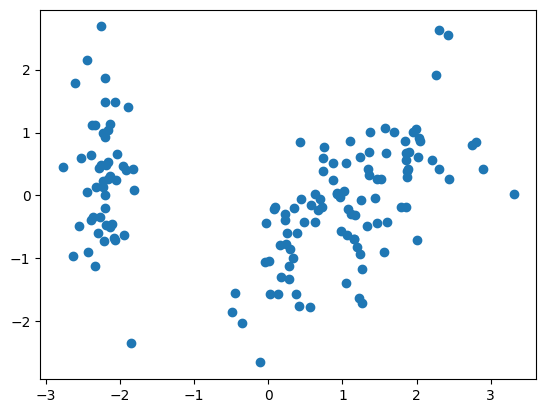

In [116]:
plt.scatter(pca_extracted_features[:,0],pca_extracted_features[:,1])

## To visulize Agglomerative Clustering I will use Dendogram

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [14.375, 14.375, 71.25, 71.25],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [142.5, 142.5, 180.0, 180.0],
  [112.5, 112.5, 161.25, 161.25],
  [42.8125, 42.8125, 136.875, 136.875],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [213.75, 213.75, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0,

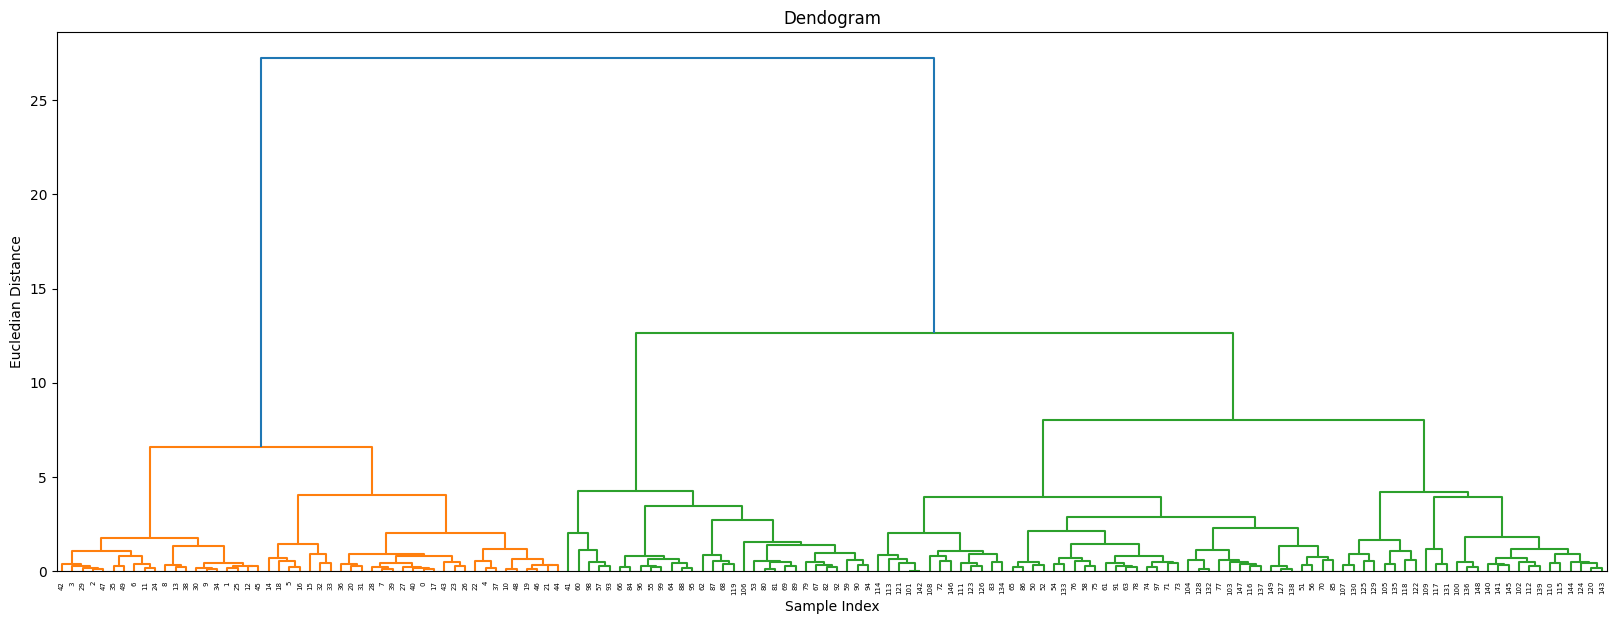

In [117]:
plt.figure(figsize=(20,7))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')
sc.dendrogram(sc.linkage(X_train_scaled,method='ward'))

## Applying Algo

In [118]:
hierarchal_cluster = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
hierarchal_cluster.fit(X_train_scaled)

AgglomerativeClustering(metric='euclidean')

In [119]:
hierarchal_cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Visualizing after Clustering

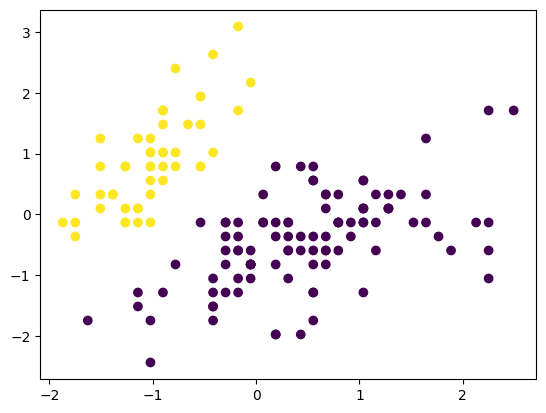

In [120]:
plt.scatter(x=X_train_scaled[:,0],y=X_train_scaled[:,1],c=hierarchal_cluster.labels_)

## Accuracy Score(silhouette score)

In [125]:
silhouette_coefficients = []
for k in range(2,11):
    agglo = AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
    agglo.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled,agglo.labels_)
    silhouette_coefficients.append(score)


In [126]:
silhouette_coefficients

[0.5770346019475989,
 0.4466890410285909,
 0.4006363159855973,
 0.33058726295230545,
 0.31485480100512825,
 0.316969830299128,
 0.310946529007258,
 0.31143422475471655,
 0.3161120375980681]

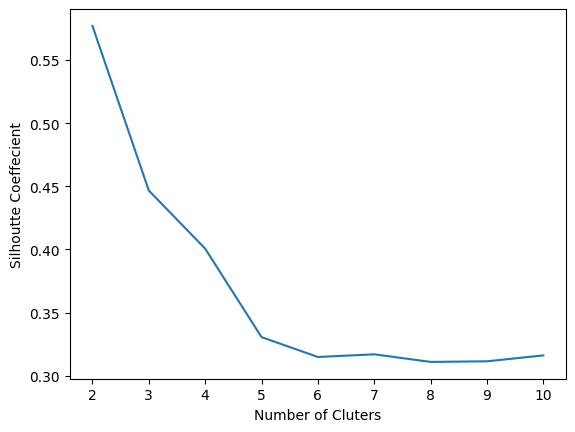

In [127]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

## We will use 2 as k(clusters) Value
